<a href="https://colab.research.google.com/github/saisiddharthnandhakumar/SpaceshipTitanicKaggle/blob/main/spaceship_titanic_testrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [251]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [252]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [253]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])


In [254]:
all_data

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name Transported  train_test  Survived
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy       False           1       NaN
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0    44.0       Juanna Vines        True           1       NaN
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0    49.0      Altark Susent       False           1       NaN
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   193.0       Solam Susent       False           1       NaN
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0     2.0  Willy Santantines        True           1       NaN
...          ...        ...       ...       ...            ...   ...    ...          ...        ...           ...     ...     ...                ...         ...         ...       ...
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False          0.0        0.0           0.0     0.0     0.0        Jeron Peter         NaN           0       NaN
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False          0.0      847.0          17.0    10.0   144.0      Matty Scheron         NaN           0       NaN
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False          0.0        0.0           0.0     0.0     0.0        Jayrin Pore         NaN           0       NaN
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False          0.0     2680.0           0.0     0.0   523.0     Kitakan Conale         NaN           0       NaN
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False          0.0        0.0           0.0     0.0     0.0   Lilace Leonzaley         NaN           0       NaN

[12970 rows x 16 columns]

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
train.describe().columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'train_test'],
      dtype='object')

In [257]:
train.dtypes


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
train_test        int64
dtype: object

In [258]:
df_num = train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [259]:
df_cat = train[['HomePlanet','CryoSleep','Cabin','Destination','VIP','Transported']]

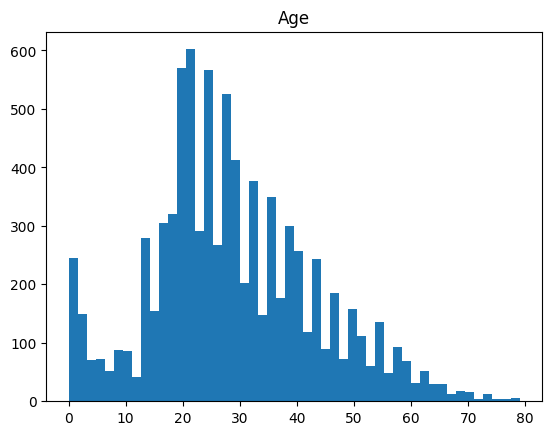

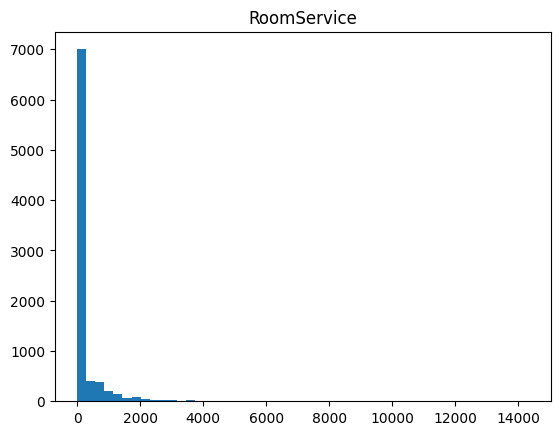

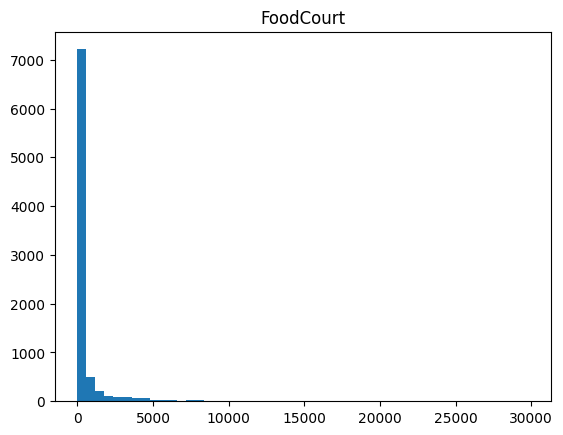

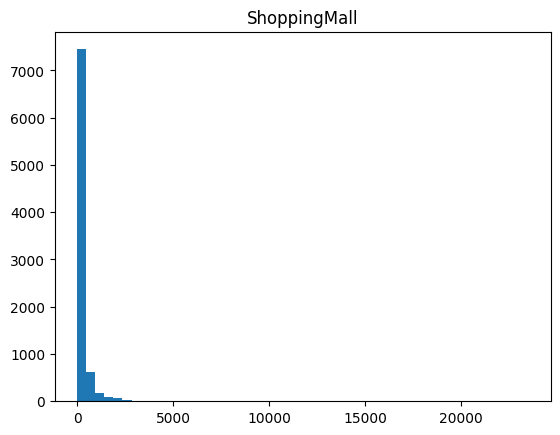

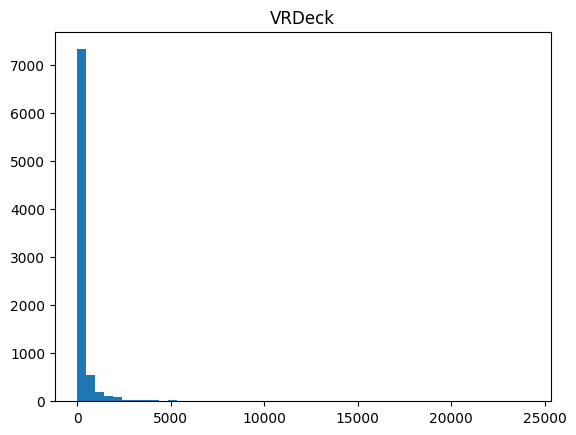

In [260]:
for i in df_num.columns:
  plt.hist(df_num[i], bins = 50)
  plt.title(i)
  plt.show()

In [261]:
#for i in df_cat.columns:
#  sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts(), data = train).set_title(i)
#  plt.show()

In [262]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
train_test        0
dtype: int64

In [263]:
len(train)

8693

In [264]:
test.isna().sum()

PassengerId        0
HomePlanet        87
CryoSleep         93
Cabin            100
Destination       92
Age               91
VIP               93
RoomService       82
FoodCourt        106
ShoppingMall      98
Spa              101
VRDeck            80
Name              94
train_test         0
Survived        4277
dtype: int64

In [265]:
#Imputing Null values for Numerical Features
train.Age = train.Age.fillna(train.Age.mean())
train.RoomService = train.RoomService.fillna(train.RoomService.median())
train.FoodCourt = train.FoodCourt.fillna(train.FoodCourt.median())
train.ShoppingMall = train.ShoppingMall.fillna(train.ShoppingMall.median())
train.Spa = train.Spa.fillna(train.Spa.median())
train.VRDeck = train.VRDeck.fillna(train.VRDeck.median())


In [266]:
#Imputing Null values for Categorical Features
train.HomePlanet = train.HomePlanet.fillna(train.HomePlanet.mode().iloc[0])
train.CryoSleep = train.CryoSleep.fillna(train.CryoSleep.mode().iloc[0])
train.Cabin = train.Cabin.fillna(train.Cabin.mode().iloc[0])
train.Destination = train.Destination.fillna(train.Destination.mode().iloc[0])
train.VIP = train.VIP.fillna(train.VIP.mode().iloc[0])


In [267]:
train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
train_test        0
dtype: int64

In [268]:
#for column in df_num:
#    train[column] = np.log1p(train[column])

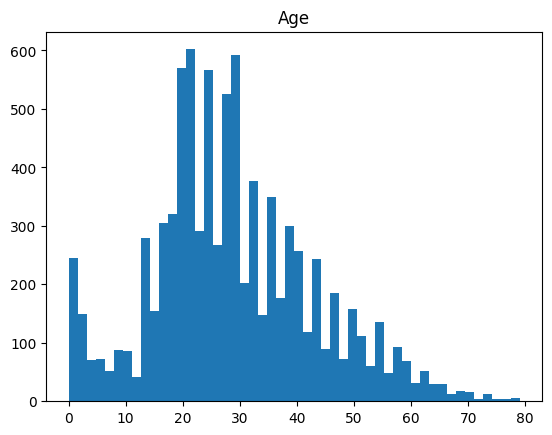

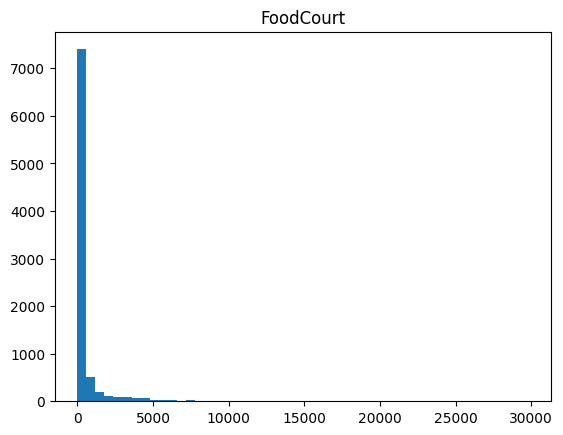

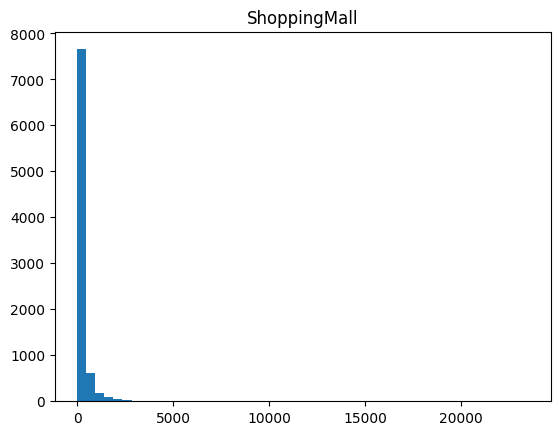

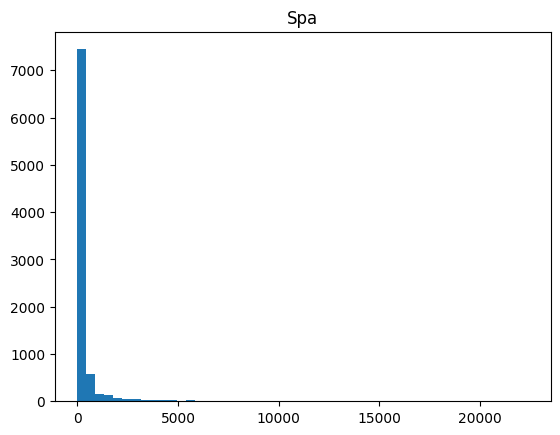

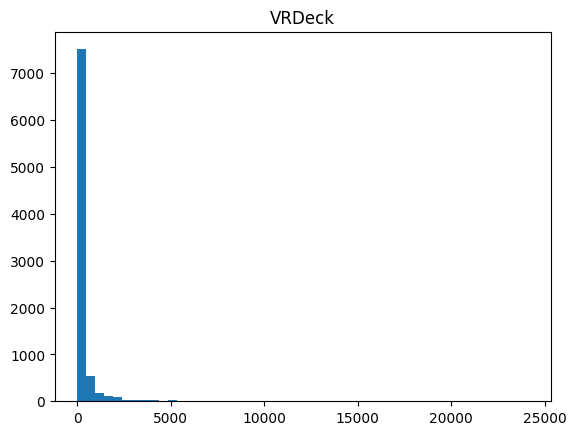

In [269]:
for i in df_num.columns:
  plt.hist(train[i], bins = 50)
  plt.title(i)
  plt.show()

In [270]:
#train['VRDecklog'] = np.log1p(train['VRDeck']+5)

In [271]:
#plt.hist(train.VRDecklog)
#plt.title('VRDeck')

In [272]:
#from sklearn.preprocessing import PowerTransformer
#
## Create an instance of PowerTransformer
#pt = PowerTransformer(method='yeo-johnson')  # Choose 'yeo-johnson' or 'box-cox'
#
## Fit the transformer on your numerical feature data
#pt.fit(train[['VRDeck']])  # Replace 'Feature1' with the actual column name
#
## Transform the feature
#train['VRDeckpower'] = pt.transform(train[['VRDeck']])

In [273]:
#plt.hist(train.VRDeckpower)
#plt.title('VRDeck')

# One hot encoding the catagorical variables

In [274]:
# Select the categorical features to be one-hot encoded
df_cat = train[['HomePlanet','CryoSleep','Cabin','Destination','VIP']]

# Perform one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df_cat)

# Concatenate the encoded features with the original train set
train = pd.concat([train, df_encoded], axis=1)

# Remove the original categorical features if needed
train.drop(['HomePlanet','CryoSleep','Cabin','Destination','VIP'], axis=1, inplace=True)

print(train)


     PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  train_test  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  Cabin_A/0/P  Cabin_A/0/S  Cabin_A/1/S  Cabin_A/10/P  Cabin_A/10/S  Cabin_A/100/S  Cabin_A/101/S  Cabin_A/102/S  Cabin_A/103/S  Cabin_A/104/S  Cabin_A/106/S  Cabin_A/107/S  Cabin_A/11/S  Cabin_A/13/P  Cabin_A/14/P  Cabin_A/14/S  Cabin_A/16/P  Cabin_A/16/S  Cabin_A/17/S  Cabin_A/18/P  Cabin_A/18/S  Cabin_A/19/P  Cabin_A/19/S  Cabin_A/2/P  Cabin_A/2/S  Cabin_A/20/P  Cabin_A/20/S  Cabin_A/21/P  Cabin_A/21/S  Cabin_A/22/P  Cabin_A/22/S  Cabin_A/23/P  Cabin_A/23/S  Cabin_A/24/P  Cabin_A/24/S  Cabin_A/25/P  Cabin_A/25/S  Cabin_A/26/S  Cabin_A/27/P  Cabin_A/27/S  Cabin_A/28/S  Cabin_A/29/P  Cabin_A/29/S  Cabin_A/3/P  Cabin_A/3/S  Cabin_A/30/P  Cabin_A/30/S  Cabin_A/31/P  Cabin_A/32/S  Cabin_A/35/P  Cabin_A/35/S  Cabin_A/36/S  Cabin_A/37/P  Cabin_A/37/S  Cabin_A/38/P  Cabin_A/39/S  Cabin_A/4/P  Cabin_A/40/P  Cabin_A/40/S 

In [275]:
#Imputing Null values for Numerical Features
test.Age = test.Age.fillna(test.Age.mean())
test.RoomService = test.RoomService.fillna(test.RoomService.median())
test.FoodCourt = test.FoodCourt.fillna(test.FoodCourt.median())
test.ShoppingMall = test.ShoppingMall.fillna(test.ShoppingMall.median())
test.Spa = test.Spa.fillna(test.Spa.median())
test.VRDeck = test.VRDeck.fillna(test.VRDeck.median())

#Imputing Null values for Categorical Features
test.HomePlanet = test.HomePlanet.fillna(test.HomePlanet.mode().iloc[0])
test.CryoSleep = test.CryoSleep.fillna(test.CryoSleep.mode().iloc[0])
test.Cabin = test.Cabin.fillna(test.Cabin.mode().iloc[0])
test.Destination = test.Destination.fillna(test.Destination.mode().iloc[0])
test.VIP = test.VIP.fillna(test.VIP.mode().iloc[0])

In [276]:
# Select the categorical features to be one-hot encoded
df_cat = test[['HomePlanet','CryoSleep','Cabin','Destination','VIP']]

# Perform one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df_cat)

# Concatenate the encoded features with the original train set
test = pd.concat([test, df_encoded], axis=1)

# Remove the original categorical features if needed
test.drop(['HomePlanet','CryoSleep','Cabin','Destination','VIP'], axis=1, inplace=True)

print(test)

     PassengerId        Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  train_test  Survived  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  Cabin_A/1/P  Cabin_A/105/S  Cabin_A/108/S  Cabin_A/109/S  Cabin_A/11/P  Cabin_A/12/P  Cabin_A/12/S  Cabin_A/13/S  Cabin_A/15/P  Cabin_A/15/S  Cabin_A/17/P  Cabin_A/26/P  Cabin_A/28/P  Cabin_A/31/S  Cabin_A/32/P  Cabin_A/33/P  Cabin_A/33/S  Cabin_A/34/P  Cabin_A/34/S  Cabin_A/36/P  Cabin_A/38/S  Cabin_A/39/P  Cabin_A/4/S  Cabin_A/41/P  Cabin_A/41/S  Cabin_A/45/P  Cabin_A/45/S  Cabin_A/46/P  Cabin_A/48/P  Cabin_A/49/P  Cabin_A/49/S  Cabin_A/56/S  Cabin_A/59/S  Cabin_A/61/P  Cabin_A/63/P  Cabin_A/63/S  Cabin_A/66/S  Cabin_A/68/S  Cabin_A/69/P  Cabin_A/69/S  Cabin_A/7/P  Cabin_A/70/P  Cabin_A/70/S  Cabin_A/73/S  Cabin_A/74/P  Cabin_A/76/P  Cabin_A/78/S  Cabin_A/8/P  Cabin_A/82/P  Cabin_A/83/S  Cabin_A/84/P  Cabin_A/85/S  Cabin_A/86/P  Cabin_A/87/P  Cabin_A/88/S  Cabin_A/91/S  Cabin_A/93/P  Cabin_A/95/S  Cabin_A/96/P

In [277]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
train.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported', 'train_test',
       ...
       'Cabin_G/999/P', 'Cabin_G/999/S', 'Cabin_T/0/P', 'Cabin_T/1/P',
       'Cabin_T/2/P', 'Cabin_T/2/S', 'Cabin_T/3/P', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object', length=6576)

In [278]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Transported'] = label_encoder.fit_transform(train['Transported'])
print(train.Transported)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


# Scaling

In [279]:
#from sklearn.preprocessing import RobustScaler
#
#scaler = RobustScaler()
#
#train_scaled = train.copy()
#test_scaled = test.copy()
#
#train_scaled = train_scaled.drop(['PassengerId', 'Name'], axis=1)
#test_scaled = test_scaled.drop(['PassengerId', 'Name'], axis=1)
#
#scaler.fit(train_scaled)  # Fit the scaler using the training data
##scaler.fit(test_scaled)
#
#train_scaled = scaler.transform(train_scaled)  # Apply the transformation to the training data
##test_scaled = scaler.transform(test_scaled)  # Apply the transformation to the test data


In [280]:
len(train.columns)
#len(test.columns)

6576

In [281]:
#train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
#test_scaled = pd.DataFrame(test_scaled, columns=test.columns)


In [282]:
type(train_scaled)

numpy.ndarray

In [283]:
#from sklearn.preprocessing import RobustScaler
#
#scaler = RobustScaler()
#
#train_scaled = train.copy()
#test_scaled = test.copy()
#
#to_be_scaled = train.columns.tolist()
#to_not_scaled = train[['PassengerId','Name']]
#to_be_scaled = [col for col in to_be_scaled if col not in to_not_scaled]
#
#train_scaled[to_be_scaled] = scaler.fit_transform(train_scaled[to_be_scaled])
#test_scaled[to_be_scaled] = scaler.fit_transform(test_scaled[to_be_scaled])
#
#

# Model Creation

In [284]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [295]:
# Independent variables (features)
X_train = train.drop(['Transported', 'Name', 'PassengerId'], axis=1)

# Dependent variable (target)
y_train = train.drop(['Name','PassengerId'], axis = 1)
y_train = train['Transported']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.3, random_state=123)

In [299]:
X_train

Age  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  train_test  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  Cabin_A/0/P  Cabin_A/0/S  Cabin_A/1/S  Cabin_A/10/P  Cabin_A/10/S  Cabin_A/100/S  Cabin_A/101/S  Cabin_A/102/S  Cabin_A/103/S  Cabin_A/104/S  Cabin_A/106/S  Cabin_A/107/S  Cabin_A/11/S  Cabin_A/13/P  Cabin_A/14/P  Cabin_A/14/S  Cabin_A/16/P  Cabin_A/16/S  Cabin_A/17/S  Cabin_A/18/P  Cabin_A/18/S  Cabin_A/19/P  Cabin_A/19/S  Cabin_A/2/P  Cabin_A/2/S  Cabin_A/20/P  Cabin_A/20/S  Cabin_A/21/P  Cabin_A/21/S  Cabin_A/22/P  Cabin_A/22/S  Cabin_A/23/P  Cabin_A/23/S  Cabin_A/24/P  Cabin_A/24/S  Cabin_A/25/P  Cabin_A/25/S  Cabin_A/26/S  Cabin_A/27/P  Cabin_A/27/S  Cabin_A/28/S  Cabin_A/29/P  Cabin_A/29/S  Cabin_A/3/P  Cabin_A/3/S  Cabin_A/30/P  Cabin_A/30/S  Cabin_A/31/P  Cabin_A/32/S  Cabin_A/35/P  Cabin_A/35/S  Cabin_A/36/S  Cabin_A/37/P  Cabin_A/37/S  Cabin_A/38/P  Cabin_A/39/S  Cabin_A/4/P  Cabin_A/40/P  Cabin_A/40/S  Cabin_A/42/P  Cabin_A/42/S  Cabin_A/43/P  Cabin_A/43/S  Cabin_A/44/P  Cabin_A/44/S  Cabin_A/46/S  Cabin_A/47/P  Cabin_A/47/S  Cabin_A/48/S  Cabin_A/5/P  Cabin_A/5/S  Cabin_A/50/P  Cabin_A/50/S  Cabin_A/51/P  Cabin_A/51/S  Cabin_A/52/P  Cabin_A/52/S  Cabin_A/53/P  Cabin_A/53/S  Cabin_A/54/P  Cabin_A/54/S  Cabin_A/55/P  Cabin_A/55/S  Cabin_A/56/P  Cabin_A/57/P  Cabin_A/57/S  Cabin_A/58/P  Cabin_A/58/S  Cabin_A/59/P  Cabin_A/6/P  Cabin_A/6/S  Cabin_A/60/P  Cabin_A/60/S  Cabin_A/61/S  Cabin_A/62/P  Cabin_A/62/S  Cabin_A/64/P  Cabin_A/64/S  Cabin_A/65/P  Cabin_A/65/S  Cabin_A/66/P  Cabin_A/67/P  Cabin_A/67/S  Cabin_A/68/P  Cabin_A/7/S  Cabin_A/71/P  Cabin_A/71/S  Cabin_A/72/P  Cabin_A/72/S  Cabin_A/73/P  Cabin_A/74/S  Cabin_A/75/P  Cabin_A/75/S  Cabin_A/76/S  Cabin_A/77/P  Cabin_A/77/S  Cabin_A/78/P  Cabin_A/79/P  Cabin_A/79/S  Cabin_A/8/S  Cabin_A/80/P  Cabin_A/80/S  Cabin_A/81/P  Cabin_A/81/S  Cabin_A/82/S  Cabin_A/83/P  Cabin_A/84/S  Cabin_A/85/P  Cabin_A/86/S  Cabin_A/87/S  Cabin_A/88/P  Cabin_A/89/P  Cabin_A/89/S  Cabin_A/9/P  Cabin_A/9/S  Cabin_A/90/P  Cabin_A/90/S  Cabin_A/91/P  Cabin_A/92/P  Cabin_A/92/S  Cabin_A/93/S  Cabin_A/94/S  Cabin_A/95/P  Cabin_A/96/S  Cabin_A/97/P  Cabin_A/97/S  Cabin_A/98/P  Cabin_A/98/S  Cabin_A/99/S  Cabin_B/0/P  Cabin_B/1/P  Cabin_B/1/S  Cabin_B/10/S  Cabin_B/100/S  Cabin_B/101/P  Cabin_B/102/P  Cabin_B/102/S  Cabin_B/103/S  Cabin_B/104/P  Cabin_B/105/P  Cabin_B/105/S  Cabin_B/106/P  Cabin_B/106/S  Cabin_B/107/P  Cabin_B/107/S  Cabin_B/109/P  Cabin_B/11/P  Cabin_B/11/S  Cabin_B/110/P  Cabin_B/111/P  Cabin_B/111/S  Cabin_B/112/S  Cabin_B/113/P  Cabin_B/113/S  Cabin_B/114/P  Cabin_B/115/P  Cabin_B/115/S  Cabin_B/116/P  Cabin_B/116/S  Cabin_B/117/P  Cabin_B/117/S  Cabin_B/118/P  Cabin_B/118/S  Cabin_B/119/P  Cabin_B/12/P  Cabin_B/120/P  Cabin_B/120/S  Cabin_B/121/P  Cabin_B/121/S  Cabin_B/122/P  Cabin_B/122/S  Cabin_B/123/S  Cabin_B/124/P  Cabin_B/125/P  Cabin_B/125/S  Cabin_B/126/P  Cabin_B/127/P  Cabin_B/128/P  Cabin_B/129/P  Cabin_B/13/S  Cabin_B/130/P  Cabin_B/130/S  Cabin_B/131/S  Cabin_B/132/P  Cabin_B/132/S  Cabin_B/133/P  Cabin_B/134/P  Cabin_B/135/P  Cabin_B/135/S  Cabin_B/136/P  Cabin_B/136/S  Cabin_B/138/P  Cabin_B/139/P  Cabin_B/139/S  Cabin_B/14/S  Cabin_B/140/S  Cabin_B/141/P  Cabin_B/142/P  Cabin_B/142/S  Cabin_B/143/P  Cabin_B/144/P  Cabin_B/144/S  Cabin_B/145/P  Cabin_B/145/S  Cabin_B/146/P  Cabin_B/146/S  Cabin_B/147/S  Cabin_B/148/P  Cabin_B/148/S  Cabin_B/149/P  Cabin_B/149/S  Cabin_B/15/P  Cabin_B/15/S  Cabin_B/150/P  Cabin_B/150/S  Cabin_B/151/P  Cabin_B/152/P  Cabin_B/152/S  Cabin_B/153/P  Cabin_B/154/P  Cabin_B/154/S  Cabin_B/155/S  Cabin_B/156/P  Cabin_B/158/P  Cabin_B/158/S  Cabin_B/159/P  Cabin_B/16/P  Cabin_B/160/P  Cabin_B/161/P  Cabin_B/161/S  Cabin_B/162/P  Cabin_B/163/S  Cabin_B/164/P  Cabin_B/164/S  Cabin_B/165/P  Cabin_B/165/S  Cabin_B/166/P  Cabin_B/166/S  Cabin_B/167/P  Cabin_B/167/S  Cabin_B/168/S  Cabin_B/169/S  Cabin_B/17/P  Cabin_B/17/S  Cabin_B/170/P  Cabin_B/170/S  Cabin_B/171/P  Cabin_B/171/S  Cabin_B/172/S  Cabin_B/175/P  Ca

In [302]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: ignored

In [301]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79107981 0.7629108  0.77112676 0.75469484 0.77555817]
0.7710740746870569


In [303]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [304]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79812207 0.79225352 0.76173709 0.74882629 0.79435958]
0.7790597088208846


In [305]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77464789 0.75117371 0.75352113 0.74178404 0.77555817]
0.759336985485179


In [307]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79342723 0.79460094 0.77347418 0.75117371 0.76968273]
0.7764717565084986


In [308]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('knn',knn),('rf',rf),('svc',svc),('xgb',xgb)], voting = 'soft')

In [309]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80868545 0.78403756 0.77699531 0.76173709 0.79318449]
0.7849279775795391


In [310]:
voting_clf.fit(X_train, y_train)
y_hat = voting_clf.predict(test)

ValueError: ignored